In [5]:
!pip install matplotlib seaborn wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------  297.0/300.2 kB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 6.2 MB/s eta 0:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

### data

In [7]:
df = pd.read_csv('../Resume/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [8]:
df = df.rename(columns={"Resume_str": "Resume"}, errors="raise")
df = df.drop(columns=['Resume_html', 'ID'])
df.head()

,Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    2484 non-null   object
 1   Category  2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


C:\Users\carlos.anton\AppData\Local\Temp\ipykernel_23340\3007165898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category" , palette="Set3", data=df, order = df['Category'].value_counts().index);


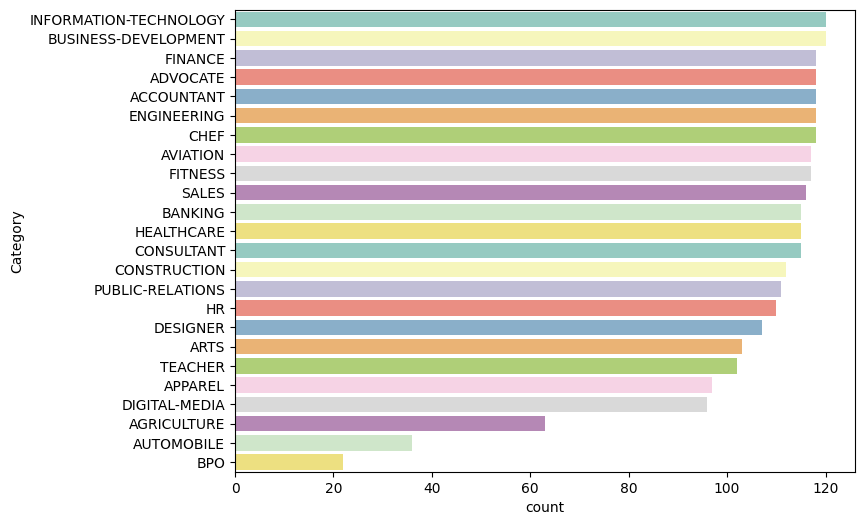

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=df, order = df['Category'].value_counts().index);

### text cleaning

In [11]:
df["Resume"][1]

"         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.\xa0        Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully r

In [12]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove non-ascii characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub(r'[0-9]+', '', resumeText)  #remove numbers
    return resumeText.lower()
    

In [13]:
df["Cleaned Resume"] = df["Resume"].apply(lambda x: cleanResume(x))
len(df["Cleaned Resume"][1])

4984

In [14]:
df.head(5)

,Resume,Category,Cleaned Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...


In [15]:
df["Cleaned Resume"][1]

' hr specialist us hr operations summary versatile media professional with background in communications marketing human resources and technology experience   to current hr specialist us hr operations company name city state managed communication regarding launch of operations group policy changes and system outages designed standard work and job aids to create comprehensive training program for new employees and contractors audited job postings for old pending on hold and draft positions audited union hourly non union hourly and salary background checks and drug screens conducted monthly new hire benefits briefing to new employees across all business units served as a link between hr managers and vendors by handling questions and resolving system related issues provide real time process improvement feedback on key metrics and initiatives successfully re branded us hr operations sharepoint site business unit project manager for rfi rfp on background check and drug screen vendor   to   i

### word clouds

In [16]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlos.anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [17]:
ds_df = df[df.Category == 'HR']
resumes=""
total_words = []
for resume in ds_df["Cleaned Resume"]:
    resumes += resume
    words = word_tokenize(resume)
    for word in words :
        if word not in set(stopwords.words('english')) and word not in string.punctuation:
            total_words.append(word)

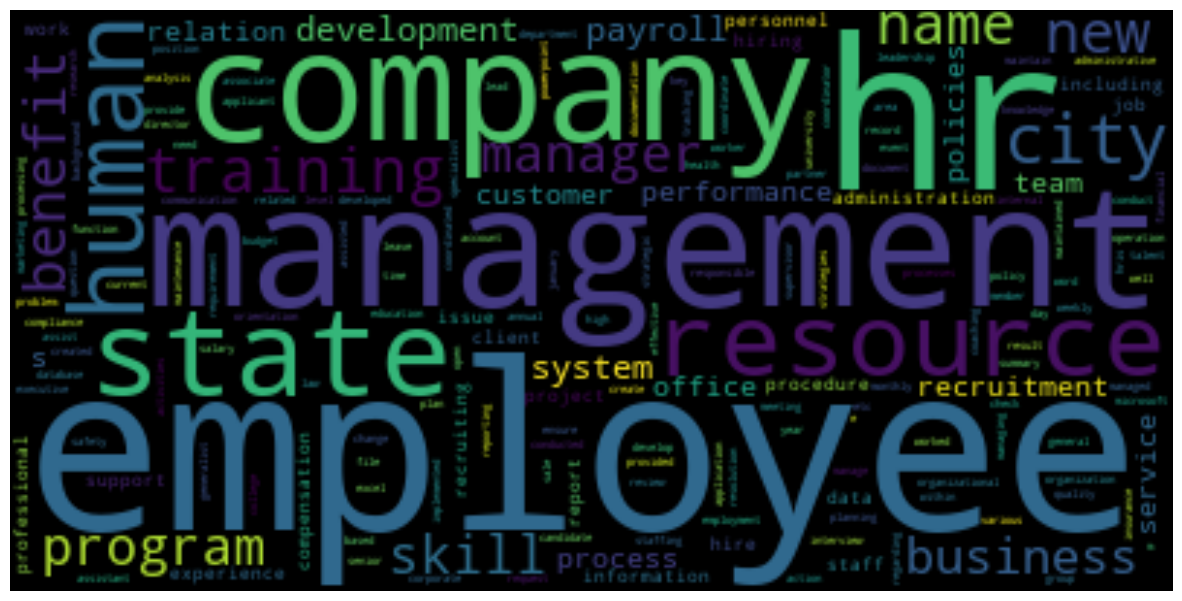

In [18]:
wordcloudimage = WordCloud( font_step=2 ,
                            max_font_size=500,
                            collocations = False,
                            #collocation_threshold = 1 
                          ).generate(resumes)

plt.figure(figsize=(15,15))
plt.imshow(wordcloudimage, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
freq_word = nltk.FreqDist(total_words)
freq_word.most_common(10)

[('hr', 1057),
 ('management', 950),
 ('employee', 828),
 ('company', 756),
 ('state', 666),
 ('human', 599),
 ('city', 568),
 ('training', 502),
 ('employees', 500),
 ('new', 457)]

### convert to numbers

In [20]:
encoder = LabelEncoder()
df['Labels']=encoder.fit_transform(df.Category)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Resume          2484 non-null   object
 1   Category        2484 non-null   object
 2   Cleaned Resume  2484 non-null   object
 3   Labels          2484 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 68.1+ KB


In [22]:
df.Labels.value_counts()[:5]

Labels
20    120
9     120
16    118
1     118
0     118
Name: count, dtype: int64

In [23]:
df.head(5)

,Resume,Category,Cleaned Resume,Labels
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...,19
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...,19
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in...,19
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...,19
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...,19


In [24]:
from sklearn.model_selection import train_test_split

text = df["Cleaned Resume"].values
labels = df["Labels"].values

text_train,text_test,y_train,y_test = train_test_split(text, labels, random_state=0, test_size=0.25, stratify=df.Labels)
print(text_train.shape)
print(y_train.shape)
print(text_test.shape)
print(y_test.shape)

(1863,)
(1863,)
(621,)
(621,)


### vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    use_idf = True,
    stop_words='english',
    max_features=1000)

In [26]:
X_train = word_vectorizer.fit_transform(text_train)
X_train.shape

(1863, 1000)

In [27]:
X_test = word_vectorizer.transform(text_test)
X_test.shape

(621, 1000)

In [28]:
import itertools
dict(itertools.islice(word_vectorizer.vocabulary_.items(), 10))

{'business': 114,
 'development': 273,
 'director': 281,
 'executive': 341,
 'profile': 712,
 'global': 392,
 'outstanding': 630,
 'presentation': 685,
 'communication': 171,
 'cross': 236}

### model - MultinomialNB

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction_mnb = clf.predict(X_test)
print('MultinomialNB Classifier accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('MultinomialNB Classifier accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))


MultinomialNB Classifier accuracy on training set: 0.64
MultinomialNB Classifier accuracy on test set: 0.58


In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_mnb, zero_division=0))

              precision    recall  f1-score   support

           0       0.59      0.90      0.71        30
           1       0.50      0.48      0.49        29
           2       0.00      0.00      0.00        16
           3       0.60      0.12      0.21        24
           4       0.50      0.04      0.07        26
           5       0.00      0.00      0.00         9
           6       0.67      0.69      0.68        29
           7       0.59      0.55      0.57        29
           8       0.00      0.00      0.00         5
           9       0.43      0.60      0.50        30
          10       0.76      0.83      0.79        30
          11       0.76      0.68      0.72        28
          12       0.33      0.03      0.06        29
          13       0.76      0.59      0.67        27
          14       0.73      0.67      0.70        24
          15       0.57      0.72      0.64        29
          16       0.81      0.57      0.67        30
          17       0.79    

### model - KNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train, y_train)
prediction_knc = model.predict(X_test)

model.fit(X_train,y_train)
print('KNeighbors Classifier accuracy on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('KNeighbors Classifier accuracy on test set: {:.2f}'.format(model.score(X_test, y_test)))

KNeighbors Classifier accuracy on training set: 0.66
KNeighbors Classifier accuracy on test set: 0.53


In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_knc, zero_division=0))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        30
           1       0.47      0.31      0.38        29
           2       1.00      0.19      0.32        16
           3       0.45      0.21      0.29        24
           4       0.33      0.19      0.24        26
           5       0.00      0.00      0.00         9
           6       0.83      0.52      0.64        29
           7       0.61      0.48      0.54        29
           8       0.00      0.00      0.00         5
           9       0.30      0.60      0.40        30
          10       0.95      0.70      0.81        30
          11       0.69      0.71      0.70        28
          12       0.09      0.03      0.05        29
          13       0.71      0.44      0.55        27
          14       0.61      0.58      0.60        24
          15       0.62      0.79      0.70        29
          16       0.70      0.70      0.70        30
          17       0.78    

### Evaluación de ambos modelos

In [38]:
def train_models(X_train, y_train):
    models = {
        "MultinomialNB": MultinomialNB(),
        "KNeighborsClassifier": KNeighborsClassifier()
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model
    return models

models = train_models(X_train, y_train)

In [39]:
from sklearn.metrics import accuracy_score

# Evaluar los modelos en el conjunto de prueba
accuracy_scores = {}
for name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

# Determinar el mejor modelo basado en la precisión
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with accuracy {accuracy_scores[best_model_name]}")

MultinomialNB Accuracy: 0.573268921095008
KNeighborsClassifier Accuracy: 0.5201288244766505
Best Model: MultinomialNB with accuracy 0.573268921095008


### Guardamos el mejor modelo con Pickle

In [40]:
import pickle

# Guarda el mejor modelo
model_file_pickle = f"{best_model_name}_best_model.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved as {model_file_pickle}")

Model saved as MultinomialNB_best_model.pkl


### Guardamos word_vectorizer y encoder

In [41]:
import joblib

joblib.dump(word_vectorizer, 'word_vectorizer.joblib')
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']